## 'Lesson 3: Aesthetics and Visualizations'

https://www.coursera.org/learn/data-analysis-r/quiz/g1z2B/hands-on-activity-aesthetics-and-visualizations

--

## Background for this activity
In this activity, youâ€™ll review a scenario, and continue to apply your knowledge of data visualization with ggplot2. You will learn more about the aesthetic features of visualizations and how to customize them by specific criteria. 

Throughout this activity, you will also have the opportunity to practice writing your own code by making changes to the code chunks yourself. If you encounter an error or get stuck, you can always check the Lesson3_Aesthetics_Solutions .rmd file in the Solutions folder under Week 4 for the complete, correct code. 

## The Scenario
In this example, you are a junior data analyst working for the same hotel booking company from earlier. Last time, you created some simple visualizations with `ggplot2` to give your stakeholders quick insights into your data. Now, you are are interested in creating visualizations that highlight different aspects of the data to present to your stakeholder. You are going to expand on what you have already learned about `ggplot2` and create new kinds of visualizations like bar charts.  

## Step 1: Import your data
If you haven't exited out of RStudio since importing this data last time, you can skip these steps. Rerunning these code chunks won't affect your console if you want to run them just in case, though.  

Run the code below to read in the file 'hotel_bookings.csv' into a data frame: 

If this line causes an error, copy in the line setwd("projects/Course 7/Week 4") before it. 

```{r load data}
hotel_bookings <- read.csv("hotel_bookings.csv")
```

In [4]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('hotel_bookings.csv')


## Step 2: Refresh Your Memory

By now, you are pretty familiar with this data set. But you can refresh your memory with the `head()` and `colnames()` functions. Run two code chunks below to get at a sample of the data and also preview all the column names:

```{r look at data}
head(hotel_bookings)
```

```{r look at column names}
colnames(hotel_bookings)
```

In [5]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Step 3: Install and load the 'ggplot2' package (optional)

If you haven't already installed and loaded the `ggplot2` package, you will need to do that before you can use the `ggplot()` function. You only have to do this once though, not every time you call `ggplot()`.

You can also skip this step if you haven't closed your RStudio account since doing the last activity. If you aren't sure, you can run the code chunk and hit 'cancel' if the warning message pops up telling you that have already downloaded the `ggplot2` package.

Run the code chunk below to install and load `ggplot2`. This may take a few minutes!

```{r loading and installing ggplot2, echo=FALSE, message=FALSE}
install.packages('ggplot2')
library(ggplot2)
```

In [7]:
import seaborn as sns

## Step 4: Making a Bar Chart

Your stakeholder is interested in developing promotions based on different booking distributions, but first they need to know how many of the transactions are occurring for each different distribution type.

You can tell `ggplot()` what type of chart you want to create by using the `geom_` argument. 

Previously, you used `geom_point` to make a scatter plot comparing lead time and number of children. Now, you will use `geom_bar` to make a bar chart in this code chunk: 

```{r example chart}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = distribution_channel))
```

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

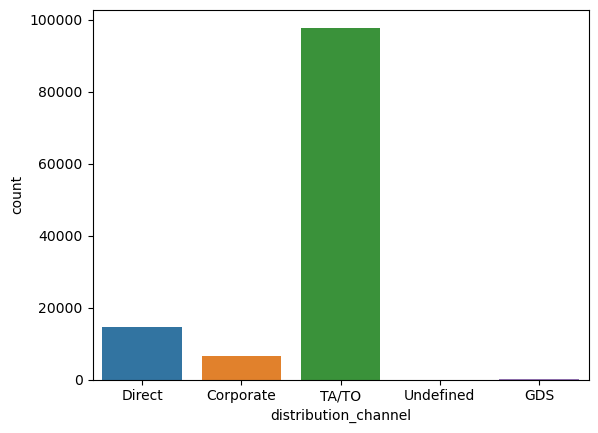

In [8]:
# Seaborn's barplot doesn't do automatic counting of 'x', but there's countplot for that!
sns.countplot(data=hotel_bookings, x = "distribution_channel")

Previously, you created scatter plots with ggplot2. This code chunk creates a bar chart with 'distribution_channel' on the x axis and 'count' on the y axis. There is data for corporate, direct, GDS, TA/TO, and undefined distribution channels. 

## Practice quiz
Use the bar chart you created to answer this question: what distribution type has the most number of bookings? Note your answer for the practice quiz question in Coursera afterwards.

A. TA/TO    X

B. Direct

C. GDS

D. Corporate

## Step 5: Diving deeper into bar charts

After exploring your bar chart, your stakeholder has more questions. Now they want to know if the number of bookings for each distribution type is different depending on whether or not there was a deposit or what market segment they represent. 

Try modifying the code below to answer the question about deposits by adding 'fill=deposit_type' after 'x = distribution_channel':

```{r pressure, echo=FALSE}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = distribution_channel, ))
```

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

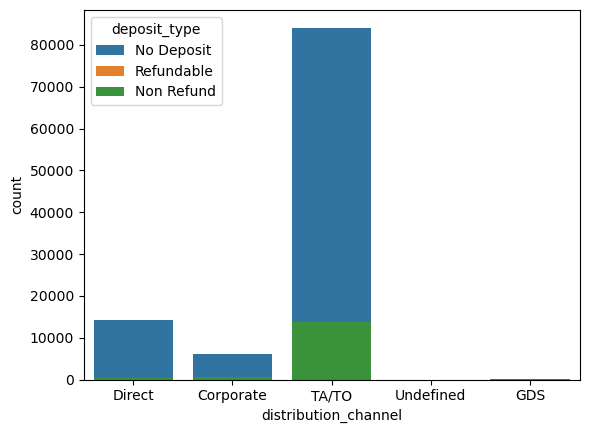

In [9]:
sns.countplot(data=hotel_bookings, x="distribution_channel", hue="deposit_type", dodge=False)


This code chunk also creates a bar chart with 'distribution_channel' on the x-axis and 'count' on the y axis. But it also includes data from 'deposit_type' column as color-coded sections of each bar. There is a legend explaining what each color represents on the right side of the visualization. 

Now try adding 'fill=market_segment' to this code chunk instead of 'fill=deposit_type':

```{r pressure, echo=FALSE}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = distribution_channel, ))
```

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

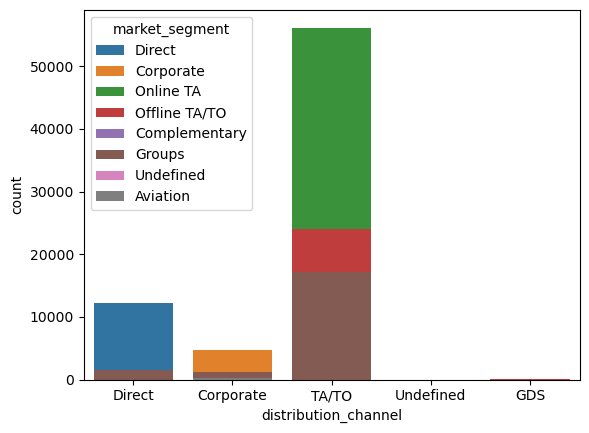

In [10]:
sns.countplot(data=hotel_bookings, x="distribution_channel", hue="market_segment", dodge=False)

This bar chart is similar to the previous chart, except that 'market_segment' data is being recorded in the color-coded sections of each bar. 

## Step 6: Facets galore

After reviewing the new charts, your stakeholder asks you to create separate charts for each deposit type and market segment to help them understand the differences more clearly.

You know that the `facet_` function can do this very quickly.

Add 'deposit_type' after the '~' symbol in the code chunk below to create a different chart for each deposit type:
```{r creating a plot}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = distribution_channel)) +
  facet_wrap(~ )
```

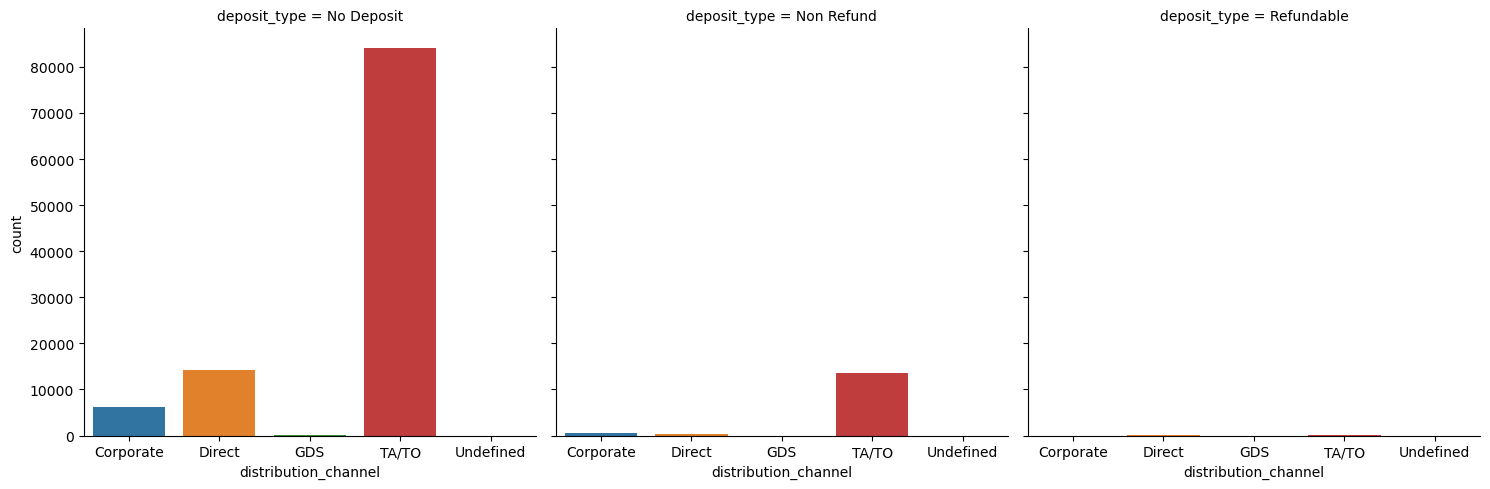

In [14]:
deposit_grouped = hotel_bookings.groupby(['distribution_channel', 'deposit_type']).size().reset_index(name='count')

sns.catplot(data=deposit_grouped, x="distribution_channel", y="count", kind="bar", col="deposit_type", col_wrap=3)

This code chunk creates three bar charts for 'no_deposit', non_refund', and 'refundable' deposit types. You notice that it's hard to read the x-axis labels here, so you add one piece of code at the end that rotates the text to 45 degrees to make it easier to read. 

Try it out below:
```{r creating a plot with rotated labels}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = distribution_channel)) +
  facet_wrap(~deposit_type) +
  theme(axis.text.x = element_text(angle = 45))
```

This code chunk creates a similar bar chart to the previous chunk, but now the labels on the x axis with the different distribution channels are clearer.

You can use the same syntax to create a different chart for each market segment:
```{r creating a plot}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = distribution_channel)) +
  facet_wrap(~market_segment) +
  theme(axis.text.x = element_text(angle = 45))
```

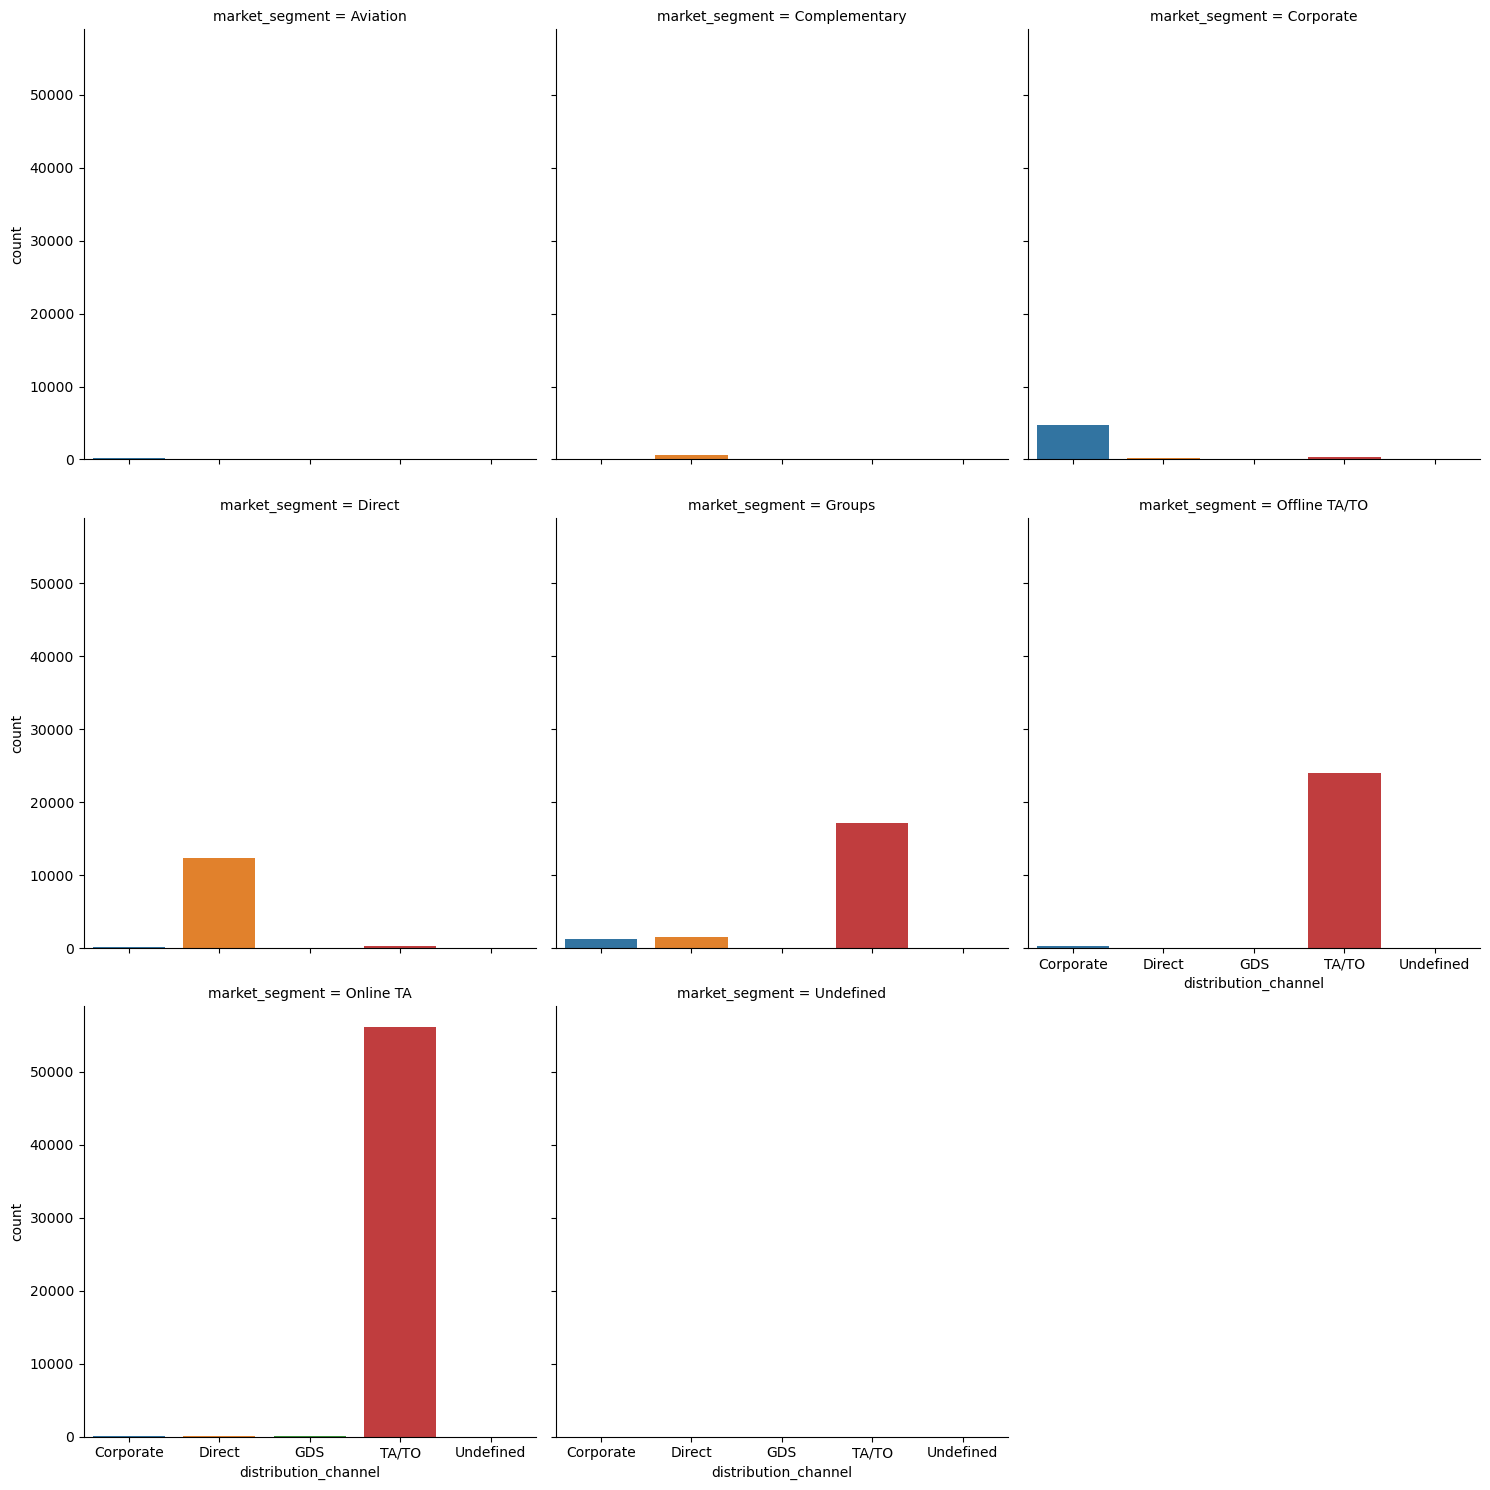

In [15]:
market_grouped = hotel_bookings.groupby(['distribution_channel', 'market_segment']).size().reset_index(name='count')

sns.catplot(data=market_grouped, x="distribution_channel", y="count", kind="bar", col="market_segment", col_wrap=3)

The `facet_grid` function does something similar. The main difference is that `facet_grid` will include plots even if they are empty. Run the code chunk below to check it out:

```{r creating a plot}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = distribution_channel)) +
  facet_grid(~deposit_type) +
  theme(axis.text.x = element_text(angle = 45))
```

Now you should have three bar charts-- but notice that the 'Refundable' chart has much less data plotted than the other two. 

Now, you could put all of this in one chart and explore the differences by deposit type and market segment.

Run the code chunk below to find out; notice how the ~ character is being used before the variables that the chart is being split by: 
```{r creating a plot}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = distribution_channel)) +
  facet_wrap(~deposit_type~market_segment) +
  theme(axis.text.x = element_text(angle = 45))
```

This **facet grid** in R is splitting the number of bookings per distribution channel into 3 different "deposit_type", and 8 different "market_segment".

We can achieve this using seaborn.FacetGrid. First, we'll need to reshape the data so that each "market_segment" and "deposit_type" combination is a separate column:

In [22]:
hotel_grouped = hotel_bookings.groupby(['distribution_channel', 'deposit_type', 'market_segment']).size().reset_index(name='count')
hotel_grouped

,distribution_channel,deposit_type,market_segment,count
0,Corporate,No Deposit,Aviation,227
1,Corporate,No Deposit,Complementary,89
2,Corporate,No Deposit,Corporate,4528
3,Corporate,No Deposit,Direct,90
4,Corporate,No Deposit,Groups,960
5,Corporate,No Deposit,Offline TA/TO,207
6,Corporate,No Deposit,Online TA,34
7,Corporate,Non Refund,Corporate,256
8,Corporate,Non Refund,Groups,268
9,Corporate,Non Refund,Offline TA/TO,5


Then, you can create the `FacetGrid` and plot the bars using `seaborn.barplot`.

This will create a facet grid with 8 rows and 3 columns, each plot showing a bar plot of "distribution_channel" on the x-axis and "count" on the y-axis.

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


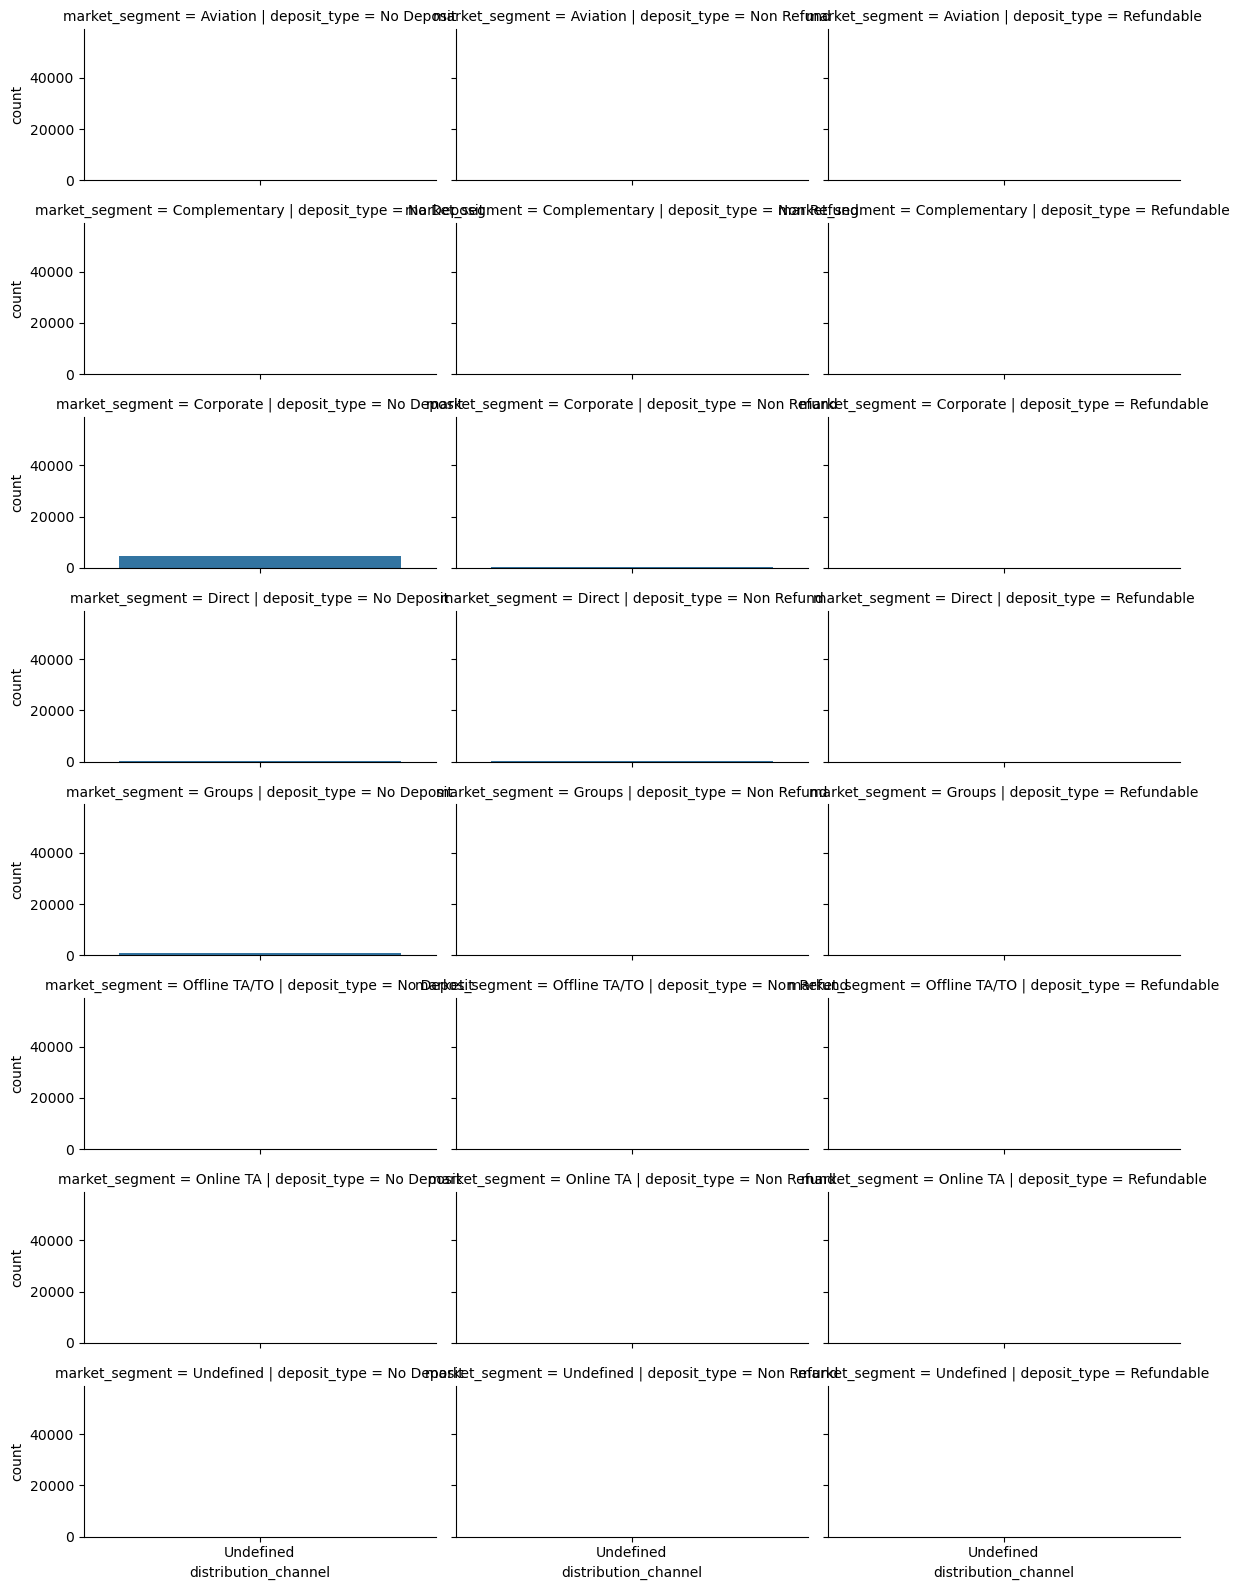

In [26]:
g = sns.FacetGrid(hotel_grouped, col="deposit_type", row="market_segment", height=2, aspect=2)
g.map(sns.barplot, "distribution_channel", "count")


These charts are probably overwhelming and too hard to read, but it can be useful if you are exploring your data through visualizations.  

## Activity Wrap Up
The `ggplot2` package allows you to create a variety of visualizations in `R`, from simple scatter plots to complicated, multi-faceted bar charts. You can practice these skills by modifying the code chunks in the rmd file, or use this code as a starting point in your own project console. As you continue exploring aesthetic arguments in `ggplot2`, consider how you might use visualizations to gain insights and make observations about other kinds of data in the future. 
